# Задание 1 
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [75]:
boston = pd.read_csv('BostonHousing.csv', quotechar='"')
data = boston["medv"]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = boston.drop('medv', axis=1)
Y = boston[['medv']]

In [78]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [79]:
Y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [83]:
from sklearn.manifold import TSNE

In [84]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

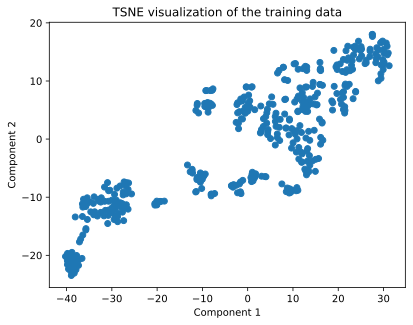

In [89]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('TSNE visualization of the training data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [21]:
from sklearn.cluster import KMeans

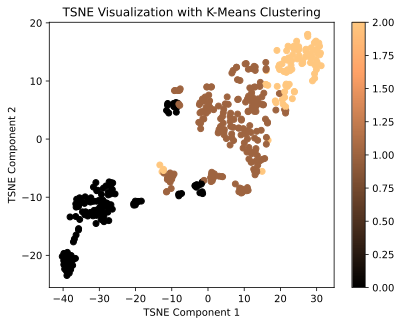

In [42]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train, cmap='copper')
plt.colorbar()
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE Visualization with K-Means Clustering')
plt.show()

In [57]:
print('Первый кластер:', Y_train['medv'][labels_train == 0].mean())
print('Второй кластер:', Y_train['medv'][labels_train == 1].mean())
print('Третий кластер:', Y_train['medv'][labels_train == 2].mean())

Первый кластер: 16.165354330708666
Второй кластер: 24.958115183246072
Третий кластер: 27.788372093023252


In [53]:
print('Первый кластер:', X_train['crim'][labels_train == 0].mean())
print('Второй кластер:', X_train['crim'][labels_train == 1].mean())
print('Третий кластер:', X_train['crim'][labels_train == 2].mean())

Первый кластер: 10.797028425196853
Второй кластер: 0.42166020942408367
Третий кластер: 0.07356558139534886


## Задание 3 *
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [72]:
X_test_clusters = model.predict(X_test_scaled)

test_cluster_means = pd.DataFrame({
    'cluster': X_test_clusters,
    'medv': Y_test['medv'],
    'crim': X_test['crim']
}).groupby('cluster').mean()

print(test_cluster_means)

              medv      crim
cluster                     
0        21.652000  0.224421
1        16.710526  9.419182
2        33.871429  0.086186
